<a href="https://colab.research.google.com/github/Arif111866/Deep-Learning-AI/blob/main/logistic_regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


Sepal Length (cm): Length of the outer flower part (sepal)

Sepal Width (cm): Width of the sepal

Petal Length (cm): Length of the inner flower part (petal)

Petal Width (cm): Width of the petal

In [3]:
# Load the iris dataset
iris = load_iris()

# Features (X) and Labels (y)
X = iris.data  # shape: (150, 4)
y = (iris.target == 0).astype(int)  # Binary: 1 if Setosa, else 0

# Print some sample data
print("Feature shape:", X.shape)
print("First 5 feature rows:\n", X[:5])
print("Target values (0 = Not Setosa, 1 = Setosa):", y[:5])


Feature shape: (150, 4)
First 5 feature rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target values (0 = Not Setosa, 1 = Setosa): [1 1 1 1 1]


In [4]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state= 1
)

# Print the shape of each split
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training feature shape: (105, 4)
Testing feature shape: (45, 4)
Training labels shape: (105,)
Testing labels shape: (45,)


In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
# Predict on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

# Print classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Setosa", "Setosa"]))


✅ Accuracy on test data: 1.0

📋 Classification Report:
              precision    recall  f1-score   support

  Not Setosa       1.00      1.00      1.00        26
      Setosa       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



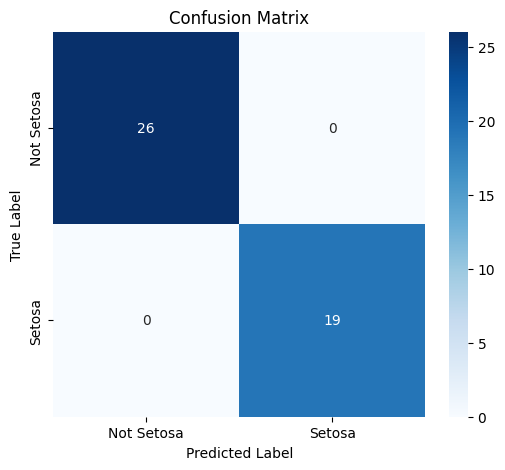

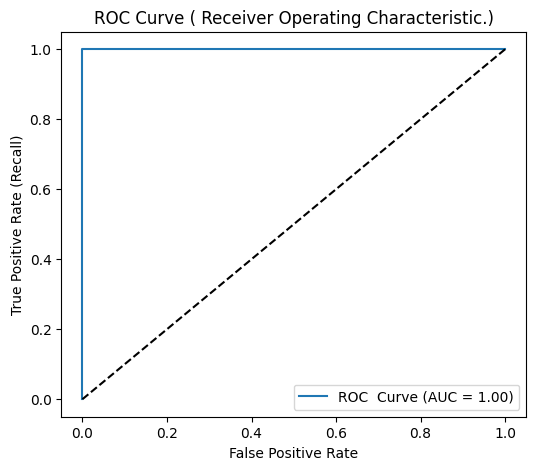

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# 1. Confusion Matrix (reuse from before)
cm = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Setosa", "Setosa"],
            yticklabels=["Not Setosa", "Setosa"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Setosa)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC  Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve ( Receiver Operating Characteristic.)')
plt.legend()
plt.show()



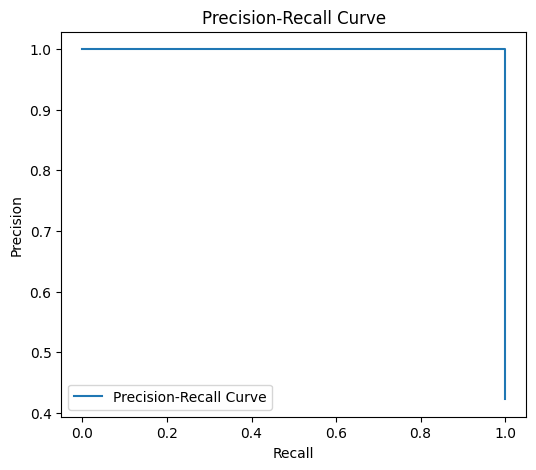

In [10]:
# 3. Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



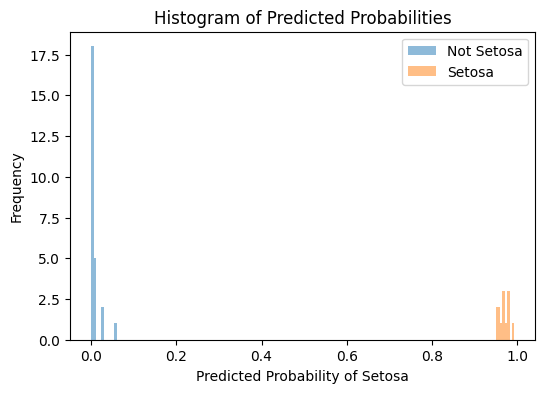

In [11]:
# 4. Predicted Probability Histogram
plt.figure(figsize=(6,4))
plt.hist(y_prob[y_test==0], bins=10, alpha=0.5, label='Not Setosa')
plt.hist(y_prob[y_test==1], bins=10, alpha=0.5, label='Setosa')
plt.xlabel('Predicted Probability of Setosa')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()